# Regressão Linear Múltipla

Enquanto a regressão linear simples envolve uma variável dependente e uma variável independente, a regressão linear múltipla envolve uma variável dependente e múltiplas variáveis independentes.

A regressão linear múltipla é uma extensão da regressão linear simples e é usada para modelar a relação entre uma variável dependente contínua e duas ou mais variáveis independentes. A equação da regressão linear múltipla é:

$𝑌=𝑏_{0}+𝑏_{1}𝑋_{1}+𝑏_{2}𝑋_{2}+...+𝑏_{𝑛}𝑋_{𝑛}+𝜖$

onde:
* $𝑌$ é a variável dependente
* $𝑋_{1},𝑋_{2},...,𝑋_{𝑛}$ são as variáveis independentes
* $𝑏_{0}$ é o intercepto
* $𝑏_{1},𝑏_{2},...,𝑏_{𝑛}$ são os coeficientes das variáveis independentes
* $𝜖$ é o termo de erro

**Importar Bibliotecas Necessárias**

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Carregar e Preparar os Dados**

In [51]:
# Gerando um dataset de exemplo
np.random.seed(0)
X1 = np.random.rand(100, 1) * 10  # variável independente 1
X2 = np.random.rand(100, 1) * 20  # variável independente 2
Y = 5 + 2 * X1 + 3 * X2 + np.random.randn(100, 1) * 5  # variável dependente com ruído

# Convertendo para DataFrame do pandas
dados = pd.DataFrame(data={'X1': X1.flatten(), 'X2': X2.flatten(), 'Y': Y.flatten()})
print(dados.head())


         X1         X2          Y
0  5.488135  13.556331  62.278442
1  7.151894   5.400159  30.104608
2  6.027634  14.703880  55.429566
3  5.448832  19.243771  71.439876
4  4.236548   4.975063  25.908122


**Dividir os Dados em Conjuntos de Treinamento e Teste**

In [52]:
X = dados[['X1', 'X2']]
Y = dados['Y']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


**Treinar o Modelo de Regressão Linear Múltipla**

In [53]:
# Criando o modelo de regressão linear múltipla
modelo = LinearRegression()

# Treinando o modelo
modelo.fit(X_train, Y_train)

LinearRegression()

**Fazer Previsões**

In [54]:
# Fazendo previsões
Y_pred = modelo.predict(X_test)

**Avaliar o Modelo**

Calcular métricas de desempenho como o erro quadrático médio (MSE) e o coeficiente de determinação (R²).

In [55]:
# Avaliando o modelo
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")

Erro Quadrático Médio (MSE): 17.73461439777715
Coeficiente de Determinação (R²): 0.9470289292066549


**Visualizar os Resultados**

Embora a visualização seja mais complicada com múltiplas variáveis independentes, podemos visualizar a relação entre as variáveis independentes e a variável dependente usando gráficos 3D ou gráficos de dispersão múltipla.

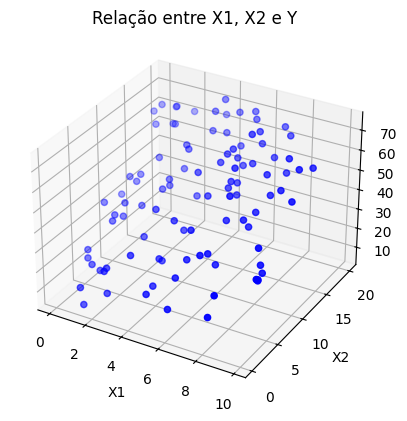

In [56]:
# Visualizando a relação entre as variáveis independentes e a variável dependente
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dados['X1'], dados['X2'], dados['Y'], color='blue', label='Dados Reais')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Relação entre X1, X2 e Y')
plt.show()


**Adicionando a Visualização dos Resíduos**

Os resíduos são fundamentais para avaliar a qualidade do modelo de regressão. Eles são as diferenças entre os valores observados e os valores previstos pelo modelo.

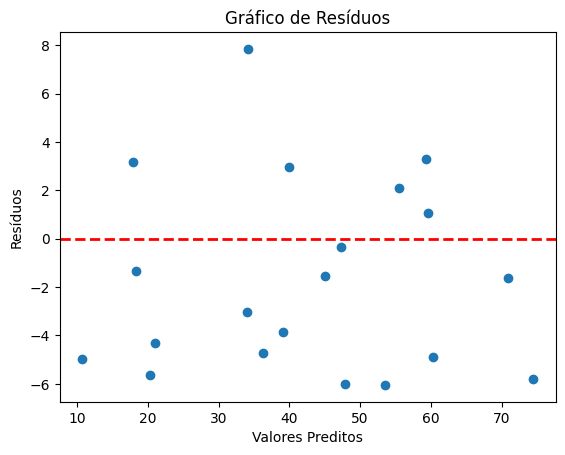

In [57]:
# Calculando os resíduos
residuos = Y_test - Y_pred

# Plotando os resíduos
plt.scatter(Y_pred, residuos)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()

**Interpretação do Gráfico de Resíduos**
* **Valores Preditos (Eixo X):** Estes são os valores previstos pelo modelo de regressão múltipla.
* **Resíduos (Eixo Y):** As diferenças entre os valores observados e os valores previstos.
* **Linha Horizontal Vermelha:** Representa a linha onde o resíduo é zero. Idealmente, os resíduos devem estar distribuídos aleatoriamente ao redor desta linha, sem mostrar um padrão claro.

**Importância dos Resíduos**
* **Distribuição Aleatória:** Uma distribuição aleatória dos resíduos ao redor da linha zero sugere que o modelo é apropriado.
* **Padrões ou Curvas:** Padrões nos resíduos podem indicar que o modelo não está capturando bem a relação entre as variáveis.
* **Heterocedasticidade:** Se a variabilidade dos resíduos aumenta ou diminui com os valores preditos, pode haver heterocedasticidade, o que viola uma das suposições da regressão linear.

❇️ Exemplo

Importação das bibliotecas

In [58]:
import statsmodels.formula.api as sm

Carregar da base de dados

In [59]:
base = pd.read_csv('mt_cars.csv')
base.shape #32 linhas e 12 colunas ↓

(32, 12)

Entendendo as colunas dos dados:

Unnamed=Nome do veículo | mpg=consumo | cyl=cilindros | disp=cilindradas | hp=cavalos

In [60]:
base.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Excluir a coluna "Unnamed" (Nome do Veículo)

In [61]:
base = base.drop(['Unnamed: 0'], axis = 1)

Buscar o Coeficiente de Correlação entre Cilindrada e Consumo para fazer a Regressão Linear simples:

In [62]:
X = base.iloc[:, 2].values # coluna disp (cilindrada [coluna 0|1|"2"|...])
y = base.iloc[:, 0].values # coluna mpg (consumo [coluna "0"|1|2|...])

correlacao = np.corrcoef(X, y) # Matriz com o Coeficiente de Correlação entre Cilindrada e Consumo
correlacao # Número resultado negativo significa que a Correlação é negativa, ou seja, enquanto um número (cilindrada) cresce o outro (consumo = eficiência = milhas por galão) diminui

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

Exibir apenas os dados da coluna disp

In [63]:
X

array([160. , 160. , 108. , 258. , 360. , 225. , 360. , 146.7, 140.8,
       167.6, 167.6, 275.8, 275.8, 275.8, 472. , 460. , 440. ,  78.7,
        75.7,  71.1, 120.1, 318. , 304. , 350. , 400. ,  79. , 120.3,
        95.1, 351. , 145. , 301. , 121. ])

Transpor de linhas para colunas:

X = X.reshape(-1, 1) é uma instrução em Python que altera a forma de um array chamado X. O método reshape recebe dois argumentos: o número de linhas e o número de colunas que o array deve ter. 

O valor -1 significa que o número de linhas ou colunas será determinado automaticamente, de acordo com o número total de elementos do array. 

Por exemplo, se X tem 12 elementos, então X.reshape(-1, 1) irá transformar X em um array com 12 linhas e 1 coluna. Isso é útil para converter um array unidimensional em um array bidimensional com uma única coluna.

In [83]:
X = X.reshape(-1, 1) 


Exibir apenas os dados da coluna disp em uma nova disposição "reshaped"

In [65]:
X


array([[160. ],
       [160. ],
       [108. ],
       [258. ],
       [360. ],
       [225. ],
       [360. ],
       [146.7],
       [140.8],
       [167.6],
       [167.6],
       [275.8],
       [275.8],
       [275.8],
       [472. ],
       [460. ],
       [440. ],
       [ 78.7],
       [ 75.7],
       [ 71.1],
       [120.1],
       [318. ],
       [304. ],
       [350. ],
       [400. ],
       [ 79. ],
       [120.3],
       [ 95.1],
       [351. ],
       [145. ],
       [301. ],
       [121. ]])

Criar o modelo, treinamento, visualização dos coeficientes e do score do modelo

In [84]:
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

Interecptação é onde os dados encontram o eixo y (vertical)

In [67]:
modelo.intercept_ 

np.float64(29.59985475616395)

Inclinação é o ângulo da reta (diagonal)

In [85]:
modelo.coef_

array([-0.04121512])

Score R² = R² é uma medida de quão bem um modelo estatístico se ajusta aos dados observados.

O R² = 0,71, significa que 71% da variação na variável dependente pode ser atribuída à variação na(s) variável(is) independente(s). 

Quanto mais próximo de 1, melhor o modelo se ajusta aos dados. 

Quanto mais próximo de 0, pior o modelo se ajusta aos dados. 

In [87]:
#Score R²
modelo.score(X, y)

0.7183433404897299

Fazer as previsões futuras dos dados

In [88]:
previsoes = modelo.predict(X)
previsoes

array([23.00543556, 23.00543556, 25.1486218 , 18.96635381, 14.76241157,
       20.32645276, 14.76241157, 23.55359666, 23.79676587, 22.69220065,
       22.69220065, 18.23272467, 18.23272467, 18.23272467, 10.14631813,
       10.64089957, 11.46520197, 26.35622482, 26.47987017, 26.66945973,
       24.64991885, 16.49344661, 17.07045829, 15.17456277, 13.11380677,
       26.34386028, 24.64167582, 25.68029685, 15.13334765, 23.62366236,
       17.19410365, 24.61282524])

In [71]:
# Criar o mesmo modelo usando o StatsModel:
modelo_ajustado = sm.ols(formula = 'mpg ~ disp', data = base)

In [72]:
modelo_ajustado

In [73]:
# Cruar um modelo de treino usando o StatsModel:
modelo_treinado = modelo_ajustado.fit()

In [74]:
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           9.38e-10
Time:                        18:13:23   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

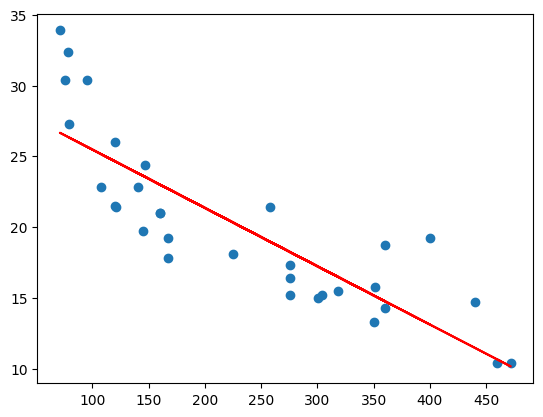

In [75]:
# Visualizar os resultados em gráfico:
plt.scatter(X, y)
plt.plot(X, previsoes, color = 'red')


In [76]:
# Prever um valor específico: qual será a eficiência (milha/galão) se eu tiver 200 cilindradas?
modelo.predict([[200]]) # resposta: 21,35 mpg

array([21.35683076])

In [77]:
# Agora fazendo uma Regressão Linear Múltipla:
# Serão usadas 3 variáveis dependentes para prever a quantidade de mpg: cyl + disp + hp

X1  = base.iloc[:, 1:4].values #[cyl + disp + hp]
X1

array([[  6. , 160. , 110. ],
       [  6. , 160. , 110. ],
       [  4. , 108. ,  93. ],
       [  6. , 258. , 110. ],
       [  8. , 360. , 175. ],
       [  6. , 225. , 105. ],
       [  8. , 360. , 245. ],
       [  4. , 146.7,  62. ],
       [  4. , 140.8,  95. ],
       [  6. , 167.6, 123. ],
       [  6. , 167.6, 123. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 472. , 205. ],
       [  8. , 460. , 215. ],
       [  8. , 440. , 230. ],
       [  4. ,  78.7,  66. ],
       [  4. ,  75.7,  52. ],
       [  4. ,  71.1,  65. ],
       [  4. , 120.1,  97. ],
       [  8. , 318. , 150. ],
       [  8. , 304. , 150. ],
       [  8. , 350. , 245. ],
       [  8. , 400. , 175. ],
       [  4. ,  79. ,  66. ],
       [  4. , 120.3,  91. ],
       [  4. ,  95.1, 113. ],
       [  8. , 351. , 264. ],
       [  6. , 145. , 175. ],
       [  8. , 301. , 335. ],
       [  4. , 121. , 109. ]])

In [78]:
y1 = base.iloc[:, 0].values #[mpg]
modelo2 = LinearRegression()
modelo2.fit(X1, y1)

LinearRegression()

In [79]:
modelo2.score(X1, y1) # Usando mais de uma variável, o Score foi maior (5 p.p.), o que ignifica que 76% (em comparação ao 71% anterior) da variação na variável dependente pode ser atribuída à variação na(s) variável(is) independente(s). 

0.7678877440928638

In [80]:
# Usando o StatsModel, criar regressão linear múltipla:
modelo_ajustado2 = sm.ols(formula = 'mpg ~ cyl  + disp + hp', data = base) # v. dependentes ~ v. independente + v. independente + v. independente
modelo_ajustado2

In [81]:
modelo_treinado2 = modelo_ajustado2.fit()
modelo_treinado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.88
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           5.05e-09
Time:                        18:13:24   Log-Likelihood:                -79.009
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      28   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1849      2.591     13.195      0.000      28.878      39.492
cyl           -1.2274      0.797     -1.540      0.135      -2.861       0.406
disp          -0.0188      0.010     -1.811      0.081      -0.040       0.002
hp            -0.0147      0.015     -1.002      0.325      -0.045       0.015
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.558
Skew:                           0.675   Prob(JB):                        0.278
Kurtosis:                       2.692   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
# Previsão de um novo registro em cyl=4 + disp=200 + hp=100:
nova_previsao = np.array([4, 200, 100])
nova_previsao = nova_previsao.reshape(1, -1)
modelo2.predict(nova_previsao) # mpg = 24,03

array([24.03968887])